Построить 5 графиков по выбранным данным.
Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек.
Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
movies_1 = movies[movies['runtime'] >= 180.0].sort_values('vote_average', ascending=False).head(15)
#делаю выборку по фильмом с 3часовым хронометражем

<BarContainer object of 15 artists>

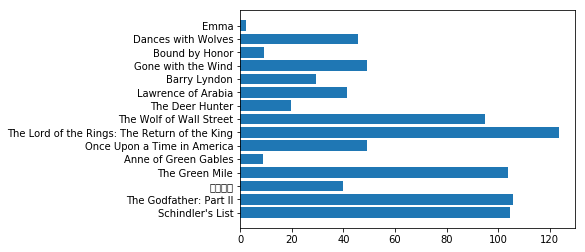

In [8]:
plt.barh(movies_1['original_title'], movies_1['popularity'])

Вывод: самый популярный фильм, у которого хронометраж больше 3 часов - The Lord of the Rings: The Return of the King, самый непопулярный фильм - Emma.

2)

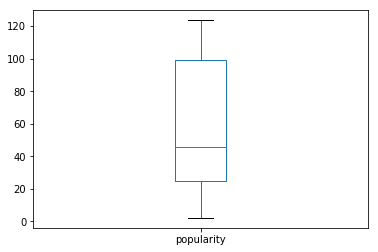

In [9]:
movies_1['popularity'].plot(kind='box')

Вывод: медиана чуть меньше 50, бОльшая часть фильмов значительно популярнее среднего.

3)

In [10]:
movies_2 = movies.sort_values('vote_average', ascending=False)

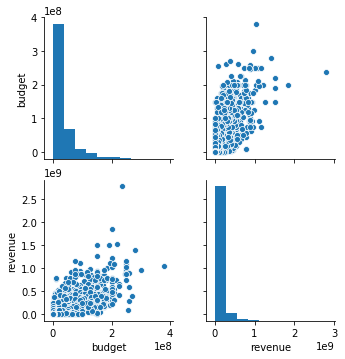

In [11]:
sns_plot = sns.pairplot(
    movies_2[['budget', 'revenue']]);
sns_plot

Вывод: линейная зависимость. Чем больше бюджет, тем выше сборы и наоборот.

4)

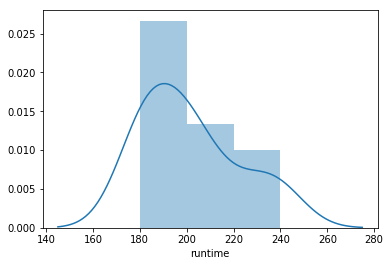

In [12]:
sns.distplot(movies_1.runtime)

Вывод: самое большое количество фильмов приходится на хронометраж 180-200 минут.

5

In [13]:
top_movies = movies.groupby('original_title')[['budget']].sum()\
    .sort_values('budget', ascending=False).head(10)
    
top_movies

,budget
original_title,
Pirates of the Caribbean: On Stranger Tides,380000000
Pirates of the Caribbean: At World's End,300000000
Avengers: Age of Ultron,280000000
Superman Returns,270000000
Tangled,260000000
John Carter,260000000
Spider-Man 3,258000000
The Lone Ranger,255000000
Harry Potter and the Half-Blood Prince,250000000


In [14]:
top_movies.style.bar()

,budget
original_title,
Pirates of the Caribbean: On Stranger Tides,380000000
Pirates of the Caribbean: At World's End,300000000
Avengers: Age of Ultron,280000000
Superman Returns,270000000
Tangled,260000000
John Carter,260000000
Spider-Man 3,258000000
The Lone Ranger,255000000
Harry Potter and the Half-Blood Prince,250000000
